In [1]:
import re
import string
from collections import Counter

In [2]:
import pandas as pd
import dovpanda

In [3]:
from tqdm import tqdm, tqdm_pandas

In [4]:
df = pd.read_excel('yaqcsv.xlsx', header=None)

In [5]:
df.head()

,0,1
0,آبار الأعراب,# جمع بئر. يقال في جمعها آبار وبئار وأبار: موض...
1,آبج,# بفتح الهمزة وبعد الألف باء موحدة مفتوحة وجيم...
2,آبر,# بفتح الهمزة وسكون الألف وضم الباء الموحدة ور...
3,آبسكون,# بفتح الهمزة وسكون الألف وفتح الباء الموحدة و...
4,آبل,# بفتح الهمزة وبعد الألف باء مكسورة ولام:\n<br...


In [6]:
df.columns = ['name', 'text']

In [7]:
sf = pd.read_excel('keywords-defs.xlsx')

In [8]:
sf.fillna(0, inplace=True)

In [9]:
sf.PreWB = sf.PreWB.astype(bool)
sf.PostWB = sf.PostWB.astype(bool)

In [10]:
sf

,Level,Keyword,PreWB,PostWB
0,1,ثغر,False,False
1,1,ثغور,False,False
2,1,حد,True,True
3,1,الحد,True,True
4,1,حدود,False,False
5,1,جبهة,False,False
6,1,جبهات,False,False
7,1,تخم,False,False
8,1,تخوم,False,False
9,1,العواصم,False,False


In [11]:
WB = r'\W'

===== iterrows is not recommended, and in the majority of cases will have better alternatives ===== (Line 6)
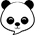

In [12]:
# Build regexes
keystrings = []
subpatterns = []
for level, group in sf.groupby('Level'):
    l = []
    for i, wd in group.iterrows():
        prefix = WB if wd.PreWB else ''
        postfix = WB if wd.PostWB else ''
        l.append(f'{prefix}{wd.Keyword.strip()}{postfix}')
    subpatterns.append(l)

In [13]:
keystrings = ['|'.join(x) for x in subpatterns]

In [14]:
k1 = re.compile(f'{keystrings[0]}')
k2 = re.compile(f'{keystrings[1]}')

In [15]:
buf = []

for r in tqdm(df.itertuples(), total=df.shape[0]):
    hi = k1.findall(r.text)
    lo = k2.findall(r.text)
    lm = 0
    if hi:
        lm = 1
    elif lo:
        lm = 2
    if not lm:
        continue
    kyws = hi + lo
    matched = ', '.join(x.strip() for x in kyws)
    buf.append([r.name, r.text, lm, matched])
    
nf = pd.DataFrame(buf, columns=['name', 'text', 'level', 'keywords'])

100%|██████████| 12454/12454 [00:01<00:00, 7872.72it/s]


In [16]:
nf

,name,text,level,keywords
0,آبسكون,# بفتح الهمزة وسكون الألف وفتح الباء الموحدة و...,2,طبرستان
1,وآبل القمح,# قرية من نواحي بانياس من أعمال دمشق بين دمشق ...,2,الخزر
2,آبه,# بالباء الموحدة: قال أبو سعد: قال الحافظ أبو ...,2,"الري., أذربيجان, الري،, طبرستان"
3,آذرم,# هكذا ضبطه أبو سعد بألف بعد الهمزة، وفتح الذا...,1,ثغور
4,آذنة,# بكسر الذال المعجمة والنون: خيال من أخيلة حمى...,1,حدود
5,آزاذوار,# بعد الألف زاي وألف وذال معجمة وواو وألف وراء...,2,نيسابور
6,آشب,# بشين معجمة وباء موحدة: صقع من ناحية طالقان ا...,2,الري،
7,آلس,# بكسر اللام: اسم نهر في بلاد الروم، وآلس هو ن...,1,"ثغر, طرسوس"
8,آمد,# بكسر الميم: وما أظنها إلا لفظة رومية، ولها ف...,2,"الجزيرة, الجزيرة"
9,آم,# بلد نسب إليه نوع من الثياب. وآم قرية من الجز...,2,الجزيرة


In [36]:
nf.iloc[30]

name                                                  الأخراب
text        # جمع خرب، بالضم، وهو منقطع الرمل.\n<br /># قا...
level                                                       1
keywords                                                 ثغور
Name: 30, dtype: object

In [37]:
print(nf.iloc[30].text)

# جمع خرب، بالضم، وهو منقطع الرمل.
<br /># قال ابن حبيب: الأخراب أقيرن حمر بين PageV01P119
<br /># السجا والثعل، وحولهما، وهي لبني الأضبط، وبني قوالة، فما يلي الثعل
<br />~~لبني قوالة بن أبي ربيعة، وما يلي السجا لبني الأضبط بن كلاب، وهما من
<br />~~أكرم مياه نجد، وأجمعه لبني كلاب. وسجا بعيدة القعر، عذبة الماء، والثعل
<br />~~أكثرهما ماء، وهو شروب، وأجلى هضاب ثلاث على مبدأة من الثعل، قال طهمان بن
<br />~~عمرو الكلابي:
<br /># لن تجد الأخراب أيمن من سجا % % إلى الثعل، إلا ألأم الناس عامرة
<br /># وروي أن عمر بن الخطاب، رضي الله عنه، قال للراشد بن عبد رب السلمي: لا
<br />~~تسكن الأخراب، فقال: ضيعتي لا بد لي منها، فقال: لكأني أنظر إليك تعي
<br />~~أمثال الذآنين حتى تموت، فكان كذلك.
<br /># وقيل: الأخراب في هذا الموضع اسم للثغور، وأخراب عزور موضع في شعر جميل
<br />~~حين قال:
<br /># حلفت برب الواقصات إلى منى، % % وما سلك الأخراب أخراب عزور



In [73]:
trs = str.maketrans('', '', string.punctuation)

def clean(text):
    text = re.sub(r'Page\w*', '', text)
    text = text.replace('<br />', '').replace('#','').replace('~','').replace('Milestone300','')
    return text

def rmpunc(text):
    return text.translate(trs)

In [71]:
for i in range(40,50):
    ct = clean(nf.iloc[i].text)
    print(i, ' '.join(ct.split(':',1)[1].split()[:4]))

IndexError: list index out of range

In [89]:
seqs = []
for r in nf.itertuples():
    c = clean(r.text)
    if ':' not in c:
        seqs.append(' '.join(c.split()[:4]))
    else:
        seqs.append(' '.join(c.split(':',1)[1].split()[:4]))

In [90]:
seqs = [rmpunc(t) for t in seqs]

In [82]:
with open('arabic_sws.txt') as f:
    sws = f.readlines()
    

In [96]:
sws = [s.strip() for s in sws] + ['اسم']

In [97]:
tgs = []
ct = 0
for s in seqs:
    h = s.split()[0]
    if h in sws:
        tgs.append(s)
    else:
        tgs.append(h)

In [98]:
nf['Type'] = tgs

In [100]:
nf.to_excel('with_type.xlsx')